# Customer Feedback Analyzer



## Step 1: Install Required Libraries



In [1]:
!pip install transformers torch

## Step 2: Import Libraries

In [2]:
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 3: Load the Sentiment Analysis Pipeline



In [16]:

sentiment_analyzer = pipeline('sentiment-analysis')

print(" Sentiment analyzer loaded successfully!")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


 Sentiment analyzer loaded successfully!


## Step 4: Create Sample Product Reviews



In [17]:

reviews = [
    "This product is amazing! Best purchase ever!",
    "Terrible quality. Broke after one use. Very disappointed.",
    "Good value for money. Works as expected.",
    "Worst customer service. Never buying again!",
    "Absolutely love it! Exceeded my expectations.",
    "Not worth the price. Poor build quality.",
    "Fast shipping and great product. Highly recommend!",
    "Complete waste of money. Don't buy this.",
    "Decent product, does what it says.",
    "Outstanding! Will definitely order again.",
    "Very unhappy with this purchase. Requesting a refund.",
    "Perfect! Exactly what I needed.",
    "Poor packaging, item arrived damaged.",
    "Great features and easy to use.",
    "Disappointed with the performance. Not as advertised.",
    "Excellent quality and fast delivery!",
    "Total scam. Save your money.",
    "Pretty good overall. Minor issues but manageable.",
    "Fantastic product! Five stars!",
    "Horrible experience. Customer service was rude."
]

print(f" Loaded {len(reviews)} reviews for analysis")

 Loaded 20 reviews for analysis


## Step 5: Analyze Sentiments



In [13]:

results = sentiment_analyzer(reviews)


df = pd.DataFrame({
    'Review': reviews,
    'Sentiment': [r['label'] for r in results],
    'Confidence': [round(r['score'], 4) for r in results]
})

print("\n Sentiment Analysis Results:")
print(df)


 Sentiment Analysis Results:
                                               Review Sentiment  Confidence
0        This product is amazing! Best purchase ever!  POSITIVE      0.9999
1   Terrible quality. Broke after one use. Very di...  NEGATIVE      0.9998
2            Good value for money. Works as expected.  POSITIVE      0.9995
3         Worst customer service. Never buying again!  NEGATIVE      0.9998
4       Absolutely love it! Exceeded my expectations.  POSITIVE      0.9999
5            Not worth the price. Poor build quality.  NEGATIVE      0.9998
6   Fast shipping and great product. Highly recomm...  POSITIVE      0.9999
7            Complete waste of money. Don't buy this.  NEGATIVE      0.9998
8                  Decent product, does what it says.  POSITIVE      0.9998
9           Outstanding! Will definitely order again.  POSITIVE      0.9999
10  Very unhappy with this purchase. Requesting a ...  NEGATIVE      0.9997
11                    Perfect! Exactly what I needed.  POS

## Step 6: Summary Statistics



In [15]:
# Count sentiments
sentiment_counts = df['Sentiment'].value_counts()

print("\n Sentiment Summary:")
print(sentiment_counts)
print(f"\nPositive Reviews: {sentiment_counts.get('POSITIVE', 0)} ({sentiment_counts.get('POSITIVE', 0)/len(reviews)*100:.1f}%)")
print(f"Negative Reviews: {sentiment_counts.get('NEGATIVE', 0)} ({sentiment_counts.get('NEGATIVE', 0)/len(reviews)*100:.1f}%)")


 Sentiment Summary:
Sentiment
POSITIVE    11
NEGATIVE     9
Name: count, dtype: int64

Positive Reviews: 11 (55.0%)
Negative Reviews: 9 (45.0%)


## Step 7: Visualize Results


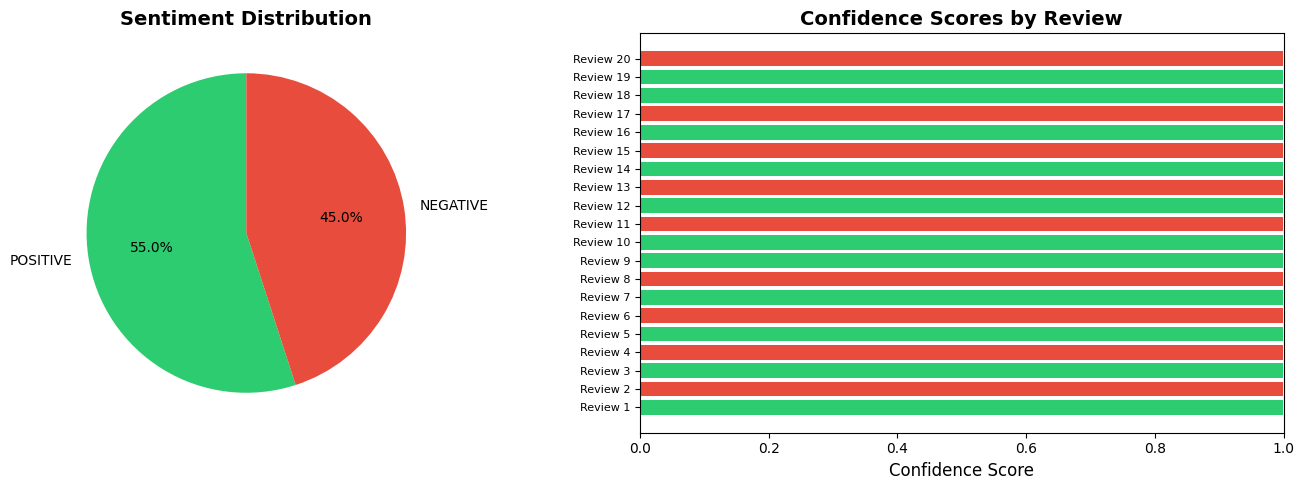

In [18]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))


colors = ['#2ecc71', '#e74c3c']
sentiment_counts.plot(kind='pie', ax=axes[0], autopct='%1.1f%%', colors=colors, startangle=90)
axes[0].set_ylabel('')
axes[0].set_title('Sentiment Distribution', fontsize=14, fontweight='bold')


sentiment_colors = df['Sentiment'].map({'POSITIVE': '#2ecc71', 'NEGATIVE': '#e74c3c'})
axes[1].barh(range(len(df)), df['Confidence'], color=sentiment_colors)
axes[1].set_yticks(range(len(df)))
axes[1].set_yticklabels([f"Review {i+1}" for i in range(len(df))], fontsize=8)
axes[1].set_xlabel('Confidence Score', fontsize=12)
axes[1].set_title('Confidence Scores by Review', fontsize=14, fontweight='bold')
axes[1].set_xlim(0, 1)

plt.tight_layout()
plt.show()

## Step 8: Identify Most Positive and Negative Reviews

In [11]:

most_positive = df[df['Sentiment'] == 'POSITIVE'].nlargest(1, 'Confidence')
print("\n Most Positive Review:")
if not most_positive.empty:
    print(f"Review: {most_positive.iloc[0]['Review']}")
    print(f"Confidence: {most_positive.iloc[0]['Confidence']*100:.2f}%")


most_negative = df[df['Sentiment'] == 'NEGATIVE'].nlargest(1, 'Confidence')
print("\n Most Negative Review:")
if not most_negative.empty:
    print(f"Review: {most_negative.iloc[0]['Review']}")
    print(f"Confidence: {most_negative.iloc[0]['Confidence']*100:.2f}%")


 Most Positive Review:
Review: This product is amazing! Best purchase ever!
Confidence: 99.99%

 Most Negative Review:
Review: Terrible quality. Broke after one use. Very disappointed.
Confidence: 99.98%
